In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import six
import sys
sys.modules['sklearn.externals.six'] = six

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Load Dataset
train = pd.read_csv("/content/drive/My Drive/Toxic/train.csv")
test = pd.read_csv("/content/drive/My Drive/Toxic/test.csv")
test_labels = pd.read_csv("/content/drive/My Drive/Toxic/test_labels.csv")
test = test.merge(test_labels, on="id")
drop_idxs = test[
    (test.toxic == -1) | (test.severe_toxic == -1) | (test.obscene == -1) | 
    (test.threat == -1) | (test.insult == -1) | (test.identity_hate == -1)
].index
test = test.drop(drop_idxs, axis="rows")

In [ ]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
test

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
frames = [train, test]
df = pd.concat(frames)
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
df_toxic = df.drop(['id', 'comment_text'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,21384
1,severe_toxic,1962
2,obscene,12140
3,threat,689
4,insult,11304
5,identity_hate,2117


Text(0.5, 0, 'category')

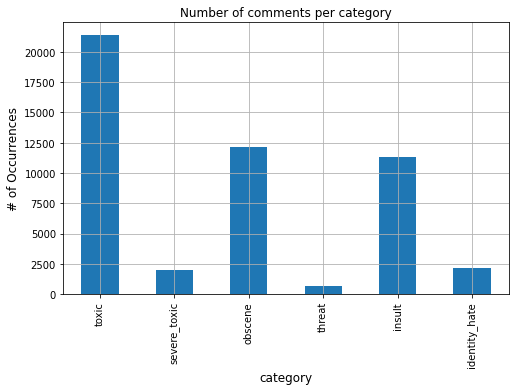

In [ ]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

In [ ]:
#Multilabel
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()


In [ ]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

df['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))


In [ ]:
#Split dataset
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(149777,)
(73772,)


In [ ]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
#!pip install mlxtend
from mlxtend.classifier import StackingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

... Processing toxic
Test accuracy is 0.9403838854850078


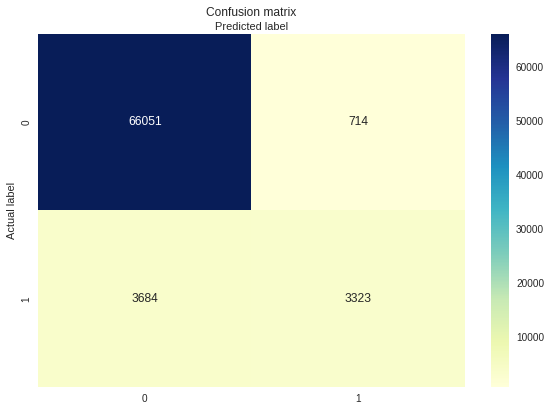

AUC: 0.89


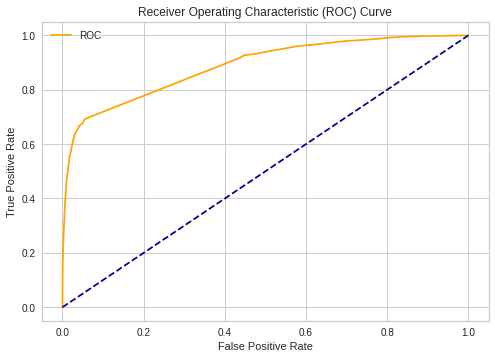

              precision    recall  f1-score   support

         Yes       0.95      0.99      0.97     66765
          No       0.82      0.47      0.60      7007

    accuracy                           0.94     73772
   macro avg       0.89      0.73      0.78     73772
weighted avg       0.94      0.94      0.93     73772



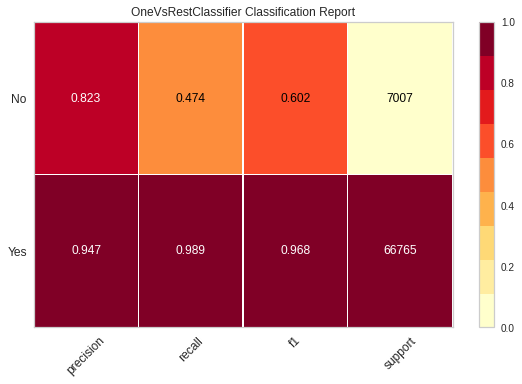

... Processing severe_toxic
Test accuracy is 0.9913110665293066


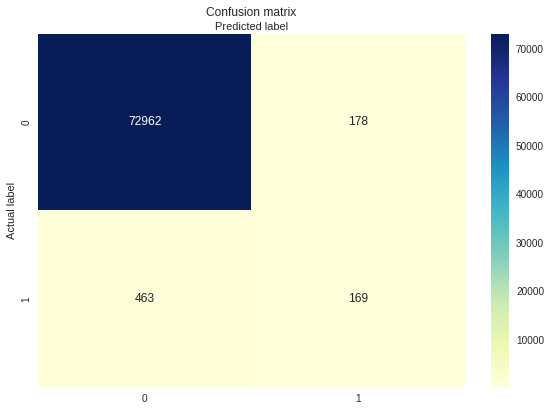

AUC: 0.96


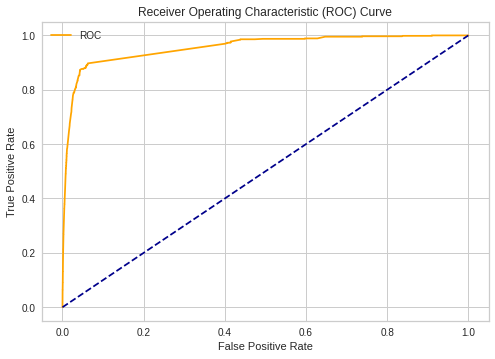

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73140
          No       0.49      0.27      0.35       632

    accuracy                           0.99     73772
   macro avg       0.74      0.63      0.67     73772
weighted avg       0.99      0.99      0.99     73772



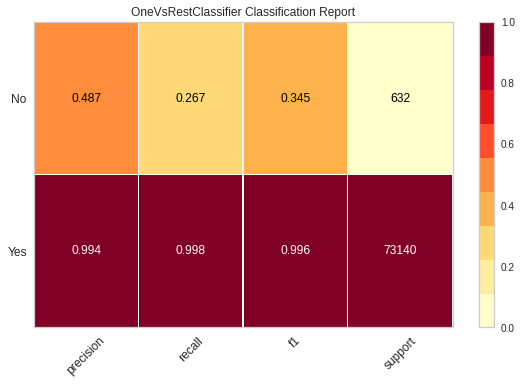

... Processing obscene
Test accuracy is 0.9684433118256249


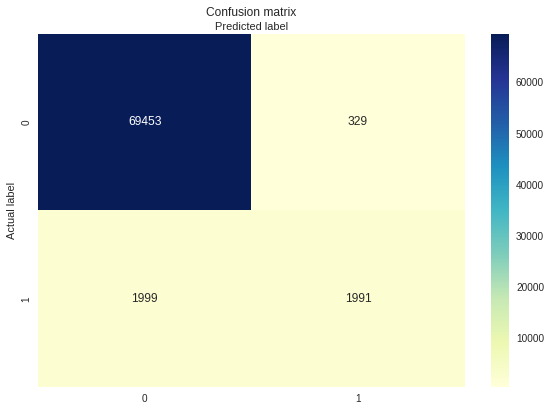

AUC: 0.94


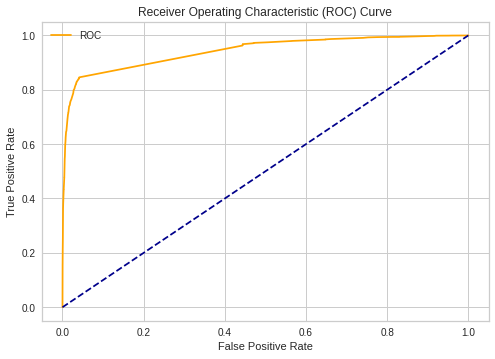

              precision    recall  f1-score   support

         Yes       0.97      1.00      0.98     69782
          No       0.86      0.50      0.63      3990

    accuracy                           0.97     73772
   macro avg       0.92      0.75      0.81     73772
weighted avg       0.97      0.97      0.96     73772



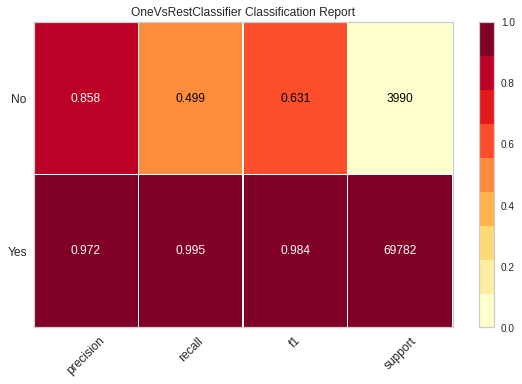

... Processing threat
Test accuracy is 0.996733177899474


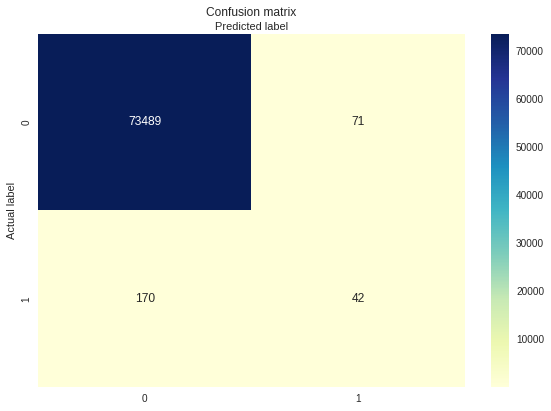

AUC: 0.94


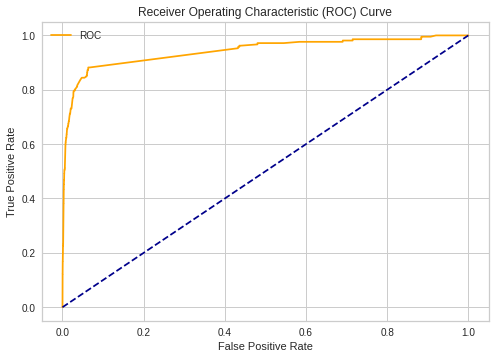

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00     73560
          No       0.37      0.20      0.26       212

    accuracy                           1.00     73772
   macro avg       0.68      0.60      0.63     73772
weighted avg       1.00      1.00      1.00     73772



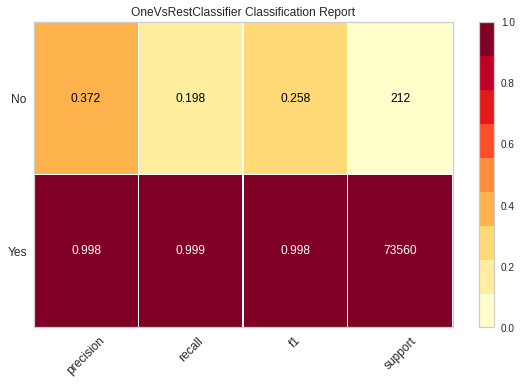

... Processing insult
Test accuracy is 0.9637802960472808


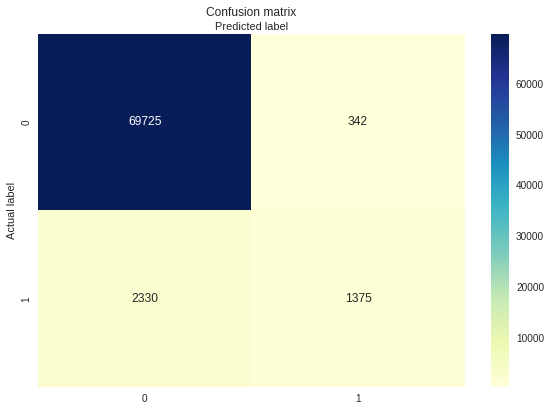

AUC: 0.92


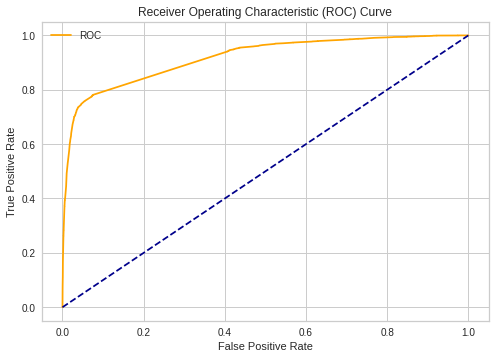

              precision    recall  f1-score   support

         Yes       0.97      1.00      0.98     70067
          No       0.80      0.37      0.51      3705

    accuracy                           0.96     73772
   macro avg       0.88      0.68      0.74     73772
weighted avg       0.96      0.96      0.96     73772



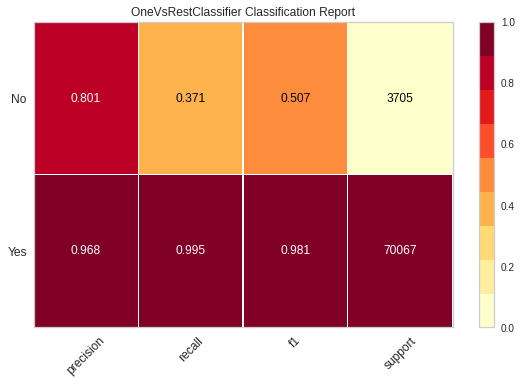

... Processing identity_hate
Test accuracy is 0.991134847909776


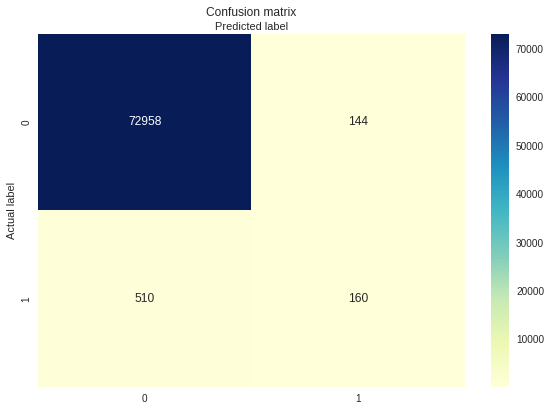

AUC: 0.93


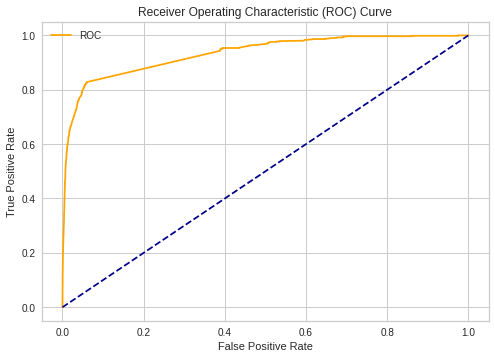

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73102
          No       0.53      0.24      0.33       670

    accuracy                           0.99     73772
   macro avg       0.76      0.62      0.66     73772
weighted avg       0.99      0.99      0.99     73772



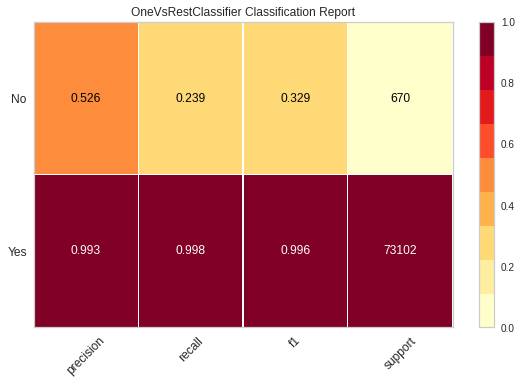

In [ ]:
#AdaBoost
AD_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(AdaBoostClassifier(), n_jobs=1)),
            ])
for category in categories:
        print('... Processing {}'.format(category))
        # train the model using X_dtm & y
        AD_pipeline.fit(X_train, train[category])
        # compute the testing accuracy
        prediction = AD_pipeline.predict(X_test)
        print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
        #confusion Matrix
        matrix =confusion_matrix(test[category], prediction)
        class_names=[0,1] 
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #ROC_AUC curve
        probs = AD_pipeline.predict_proba(X_test) 
        probs = probs[:, 1]  
        auc = roc_auc_score(test[category], probs)  
        print('AUC: %.2f' % auc)
        le = preprocessing.LabelEncoder()
        y_test1=le.fit_transform(test[category])
        fpr, tpr, thresholds = roc_curve(y_test1, probs)
        plot_roc_curve(fpr, tpr)
        #Classification report
        target_names = ['Yes', 'No']
        print(classification_report(test[category], prediction, target_names=target_names))
        classes = ["Yes", "No"]
        visualizer = ClassificationReport(AD_pipeline, classes=classes, support=True)
        visualizer.fit(X_train, train[category])  
        visualizer.score(X_test, test[category])  
        g = visualizer.poof()

... Processing toxic
Test accuracy is 0.9351922138480724


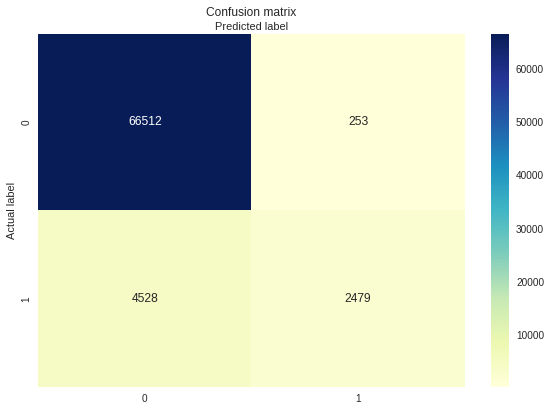

AUC: 0.90


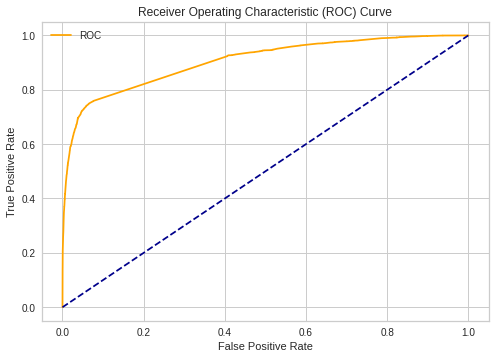

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97     66765
          No       0.91      0.35      0.51      7007

    accuracy                           0.94     73772
   macro avg       0.92      0.67      0.74     73772
weighted avg       0.93      0.94      0.92     73772



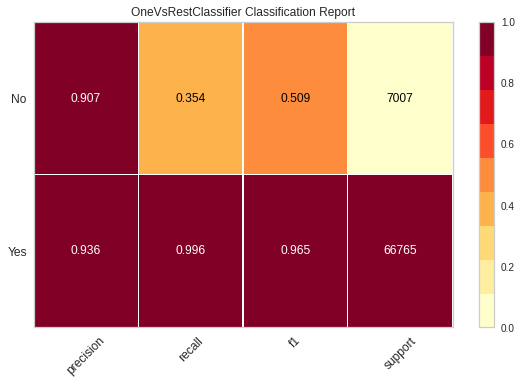

... Processing severe_toxic
Test accuracy is 0.9917177248820691


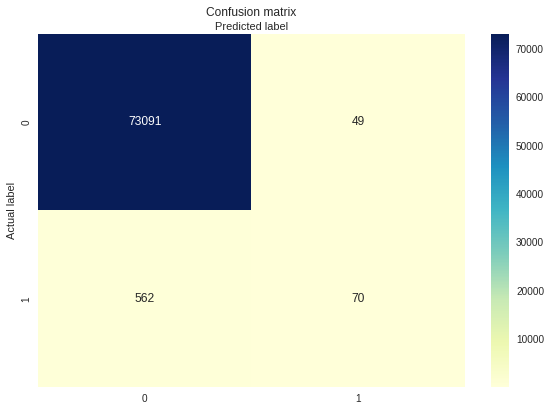

AUC: 0.97


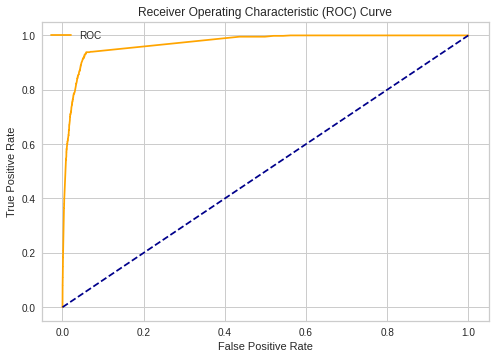

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73140
          No       0.59      0.11      0.19       632

    accuracy                           0.99     73772
   macro avg       0.79      0.56      0.59     73772
weighted avg       0.99      0.99      0.99     73772



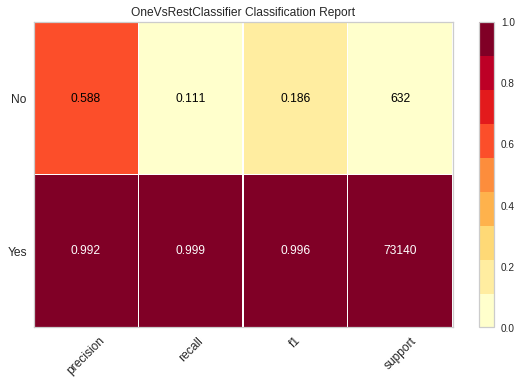

... Processing obscene
Test accuracy is 0.9687686385078349


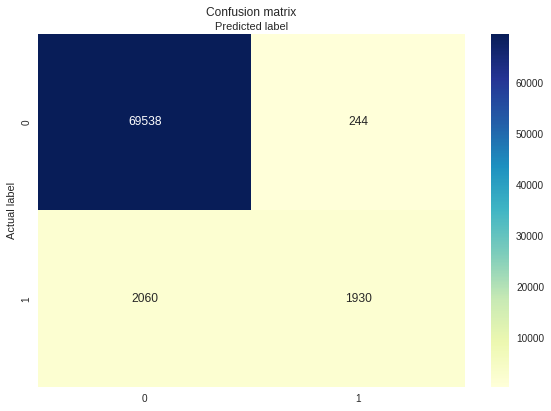

AUC: 0.95


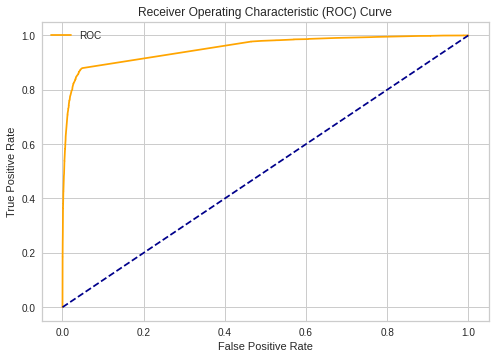

              precision    recall  f1-score   support

         Yes       0.97      1.00      0.98     69782
          No       0.89      0.48      0.63      3990

    accuracy                           0.97     73772
   macro avg       0.93      0.74      0.80     73772
weighted avg       0.97      0.97      0.96     73772



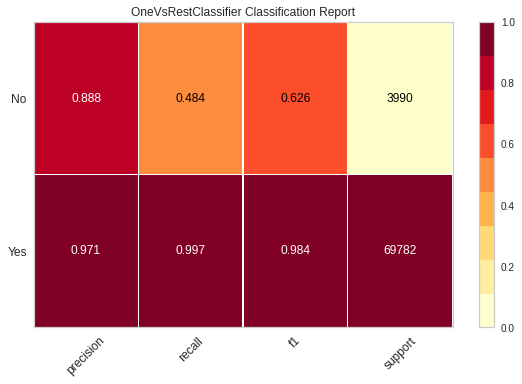

... Processing threat
Test accuracy is 0.9972482784796399


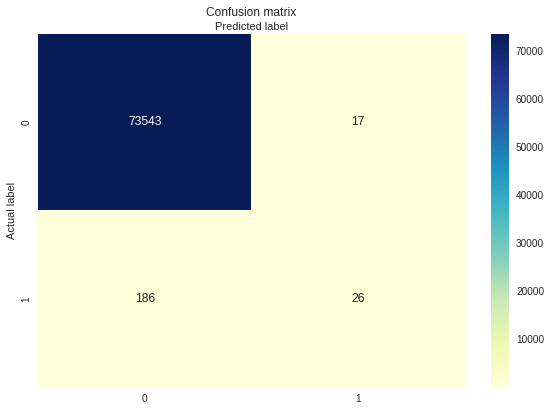

AUC: 0.96


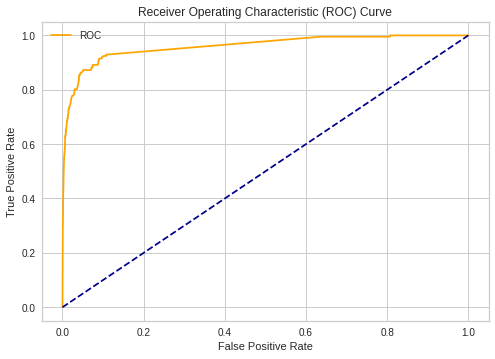

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00     73560
          No       0.60      0.12      0.20       212

    accuracy                           1.00     73772
   macro avg       0.80      0.56      0.60     73772
weighted avg       1.00      1.00      1.00     73772



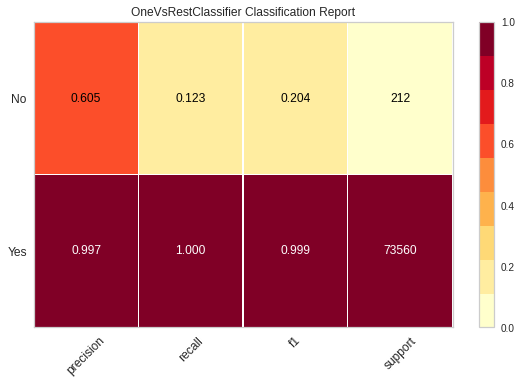

... Processing insult
Test accuracy is 0.9623163259773356


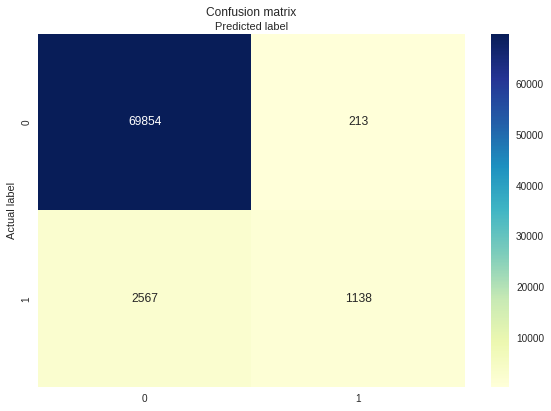

AUC: 0.93


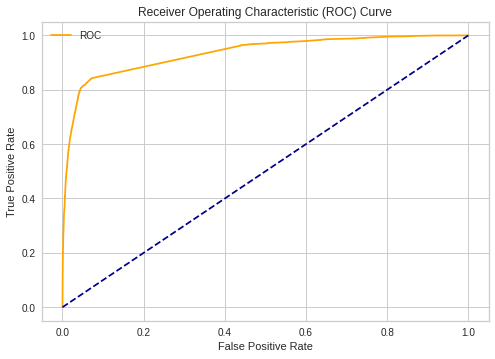

              precision    recall  f1-score   support

         Yes       0.96      1.00      0.98     70067
          No       0.84      0.31      0.45      3705

    accuracy                           0.96     73772
   macro avg       0.90      0.65      0.72     73772
weighted avg       0.96      0.96      0.95     73772



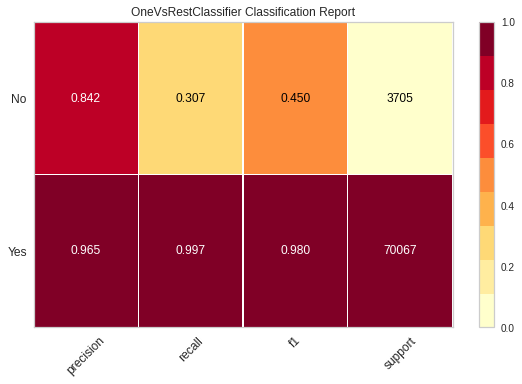

... Processing identity_hate
Test accuracy is 0.9920159410074283


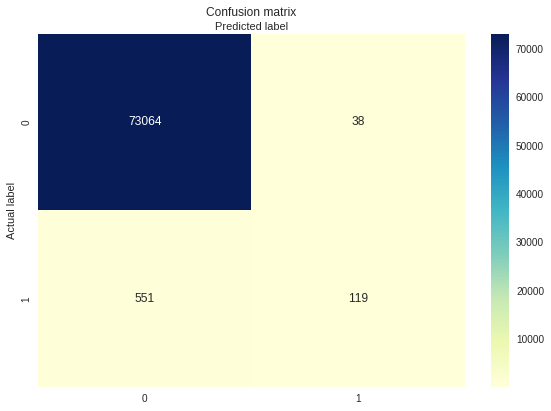

AUC: 0.95


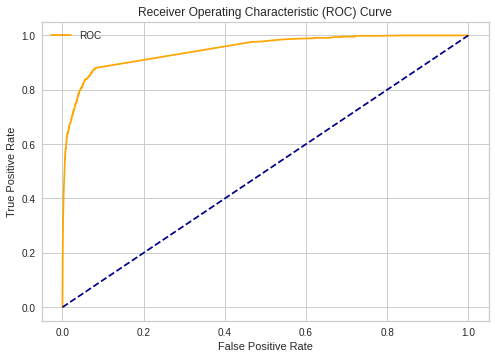

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73102
          No       0.76      0.18      0.29       670

    accuracy                           0.99     73772
   macro avg       0.88      0.59      0.64     73772
weighted avg       0.99      0.99      0.99     73772



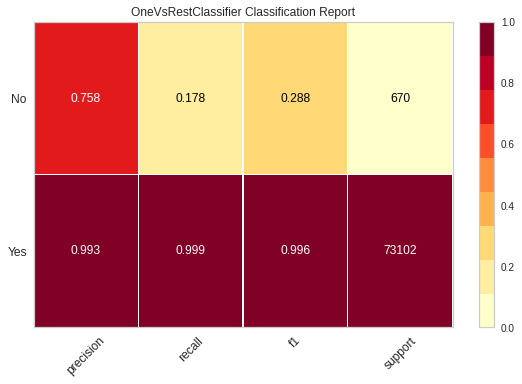

In [ ]:
#XGBoost
XG_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(xgb.XGBClassifier(), n_jobs=1)),
            ])
for category in categories:
        print('... Processing {}'.format(category))
        # train the model using X_dtm & y
        XG_pipeline.fit(X_train, train[category])
        # compute the testing accuracy
        prediction = XG_pipeline.predict(X_test)
        print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
        #confusion Matrix
        matrix =confusion_matrix(test[category], prediction)
        class_names=[0,1] 
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #ROC_AUC curve
        probs = XG_pipeline.predict_proba(X_test) 
        probs = probs[:, 1]  
        auc = roc_auc_score(test[category], probs)  
        print('AUC: %.2f' % auc)
        le = preprocessing.LabelEncoder()
        y_test1=le.fit_transform(test[category])
        fpr, tpr, thresholds = roc_curve(y_test1, probs)
        plot_roc_curve(fpr, tpr)
        #Classification report
        target_names = ['Yes', 'No']
        print(classification_report(test[category], prediction, target_names=target_names))
        classes = ["Yes", "No"]
        visualizer = ClassificationReport(XG_pipeline, classes=classes, support=True)
        visualizer.fit(X_train, train[category])  
        visualizer.score(X_test, test[category])  
        g = visualizer.poof()

... Processing toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test accuracy is 0.9504147915198178


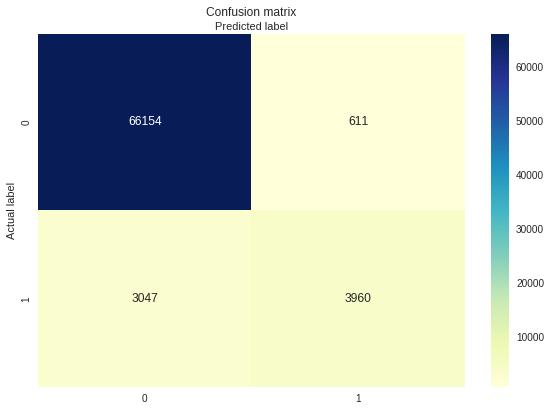

AUC: 0.96


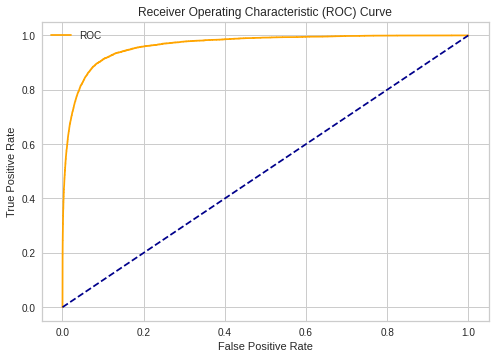

              precision    recall  f1-score   support

         Yes       0.96      0.99      0.97     66765
          No       0.87      0.57      0.68      7007

    accuracy                           0.95     73772
   macro avg       0.91      0.78      0.83     73772
weighted avg       0.95      0.95      0.95     73772



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


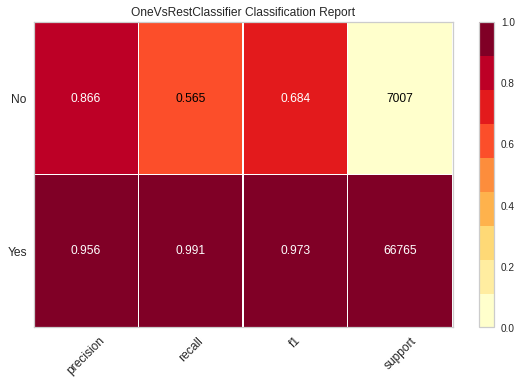

... Processing severe_toxic
Test accuracy is 0.9920837173995554


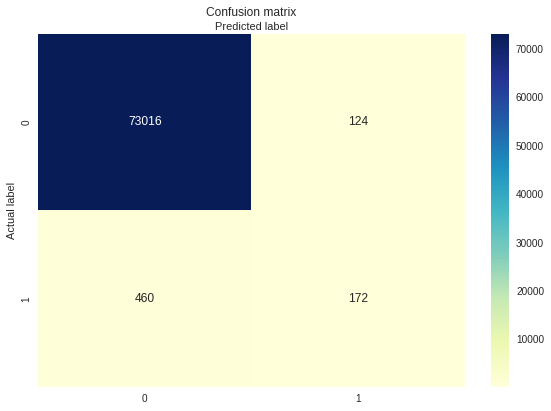

AUC: 0.99


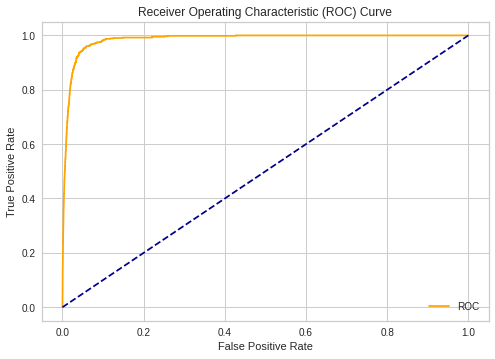

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73140
          No       0.58      0.27      0.37       632

    accuracy                           0.99     73772
   macro avg       0.79      0.64      0.68     73772
weighted avg       0.99      0.99      0.99     73772



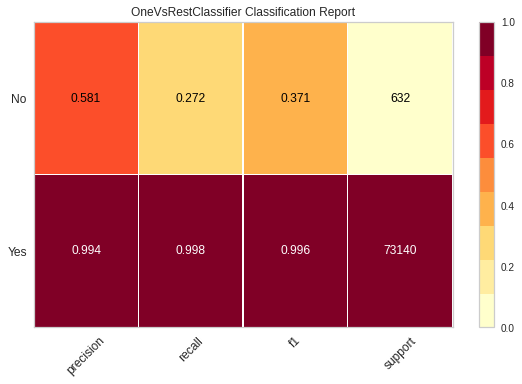

... Processing obscene
Test accuracy is 0.9734045437293282


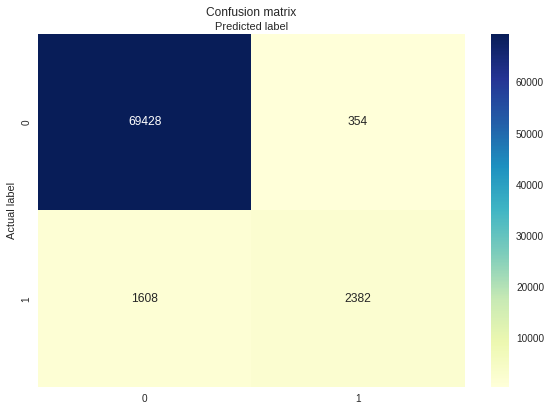

AUC: 0.98


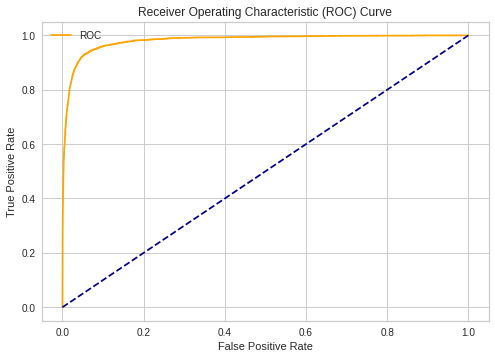

              precision    recall  f1-score   support

         Yes       0.98      0.99      0.99     69782
          No       0.87      0.60      0.71      3990

    accuracy                           0.97     73772
   macro avg       0.92      0.80      0.85     73772
weighted avg       0.97      0.97      0.97     73772



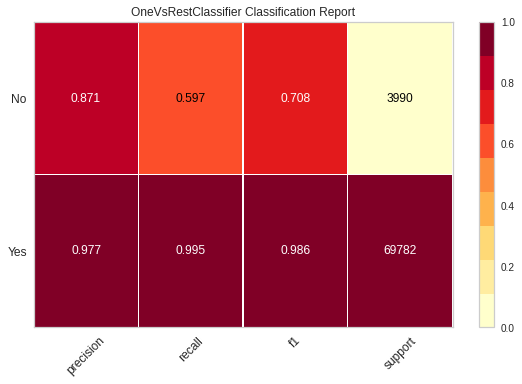

... Processing threat
Test accuracy is 0.9972482784796399


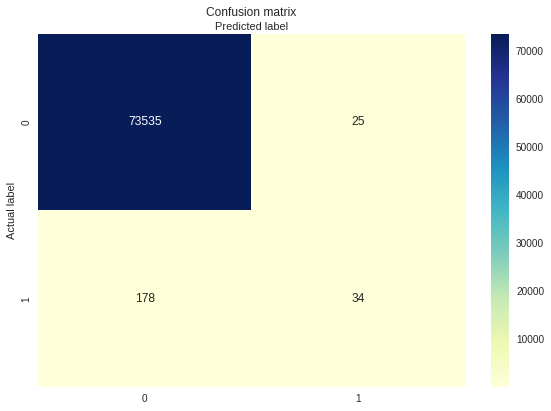

AUC: 0.98


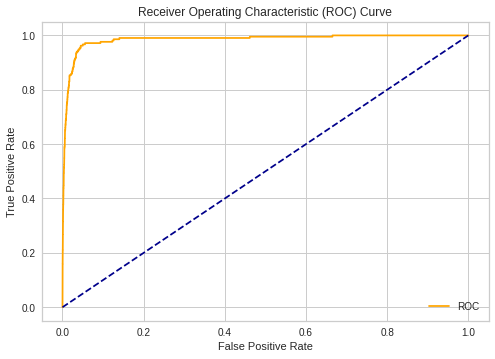

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00     73560
          No       0.58      0.16      0.25       212

    accuracy                           1.00     73772
   macro avg       0.79      0.58      0.62     73772
weighted avg       1.00      1.00      1.00     73772



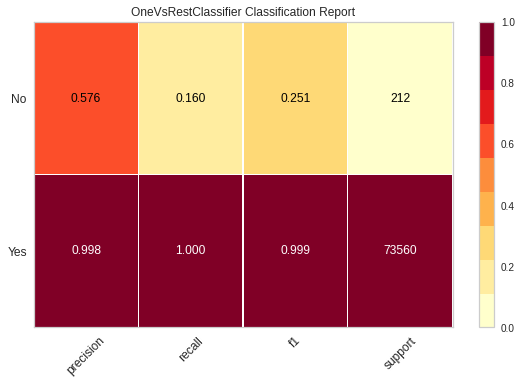

... Processing insult
Test accuracy is 0.9687008621157078


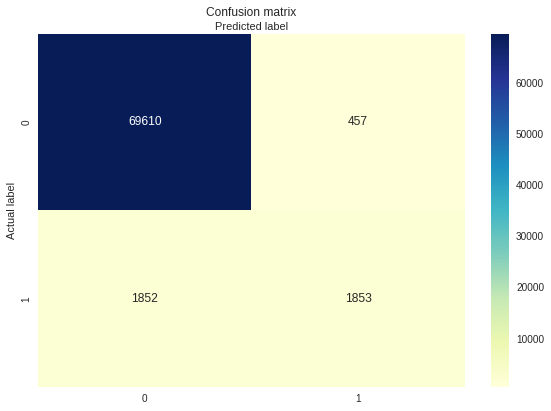

AUC: 0.97


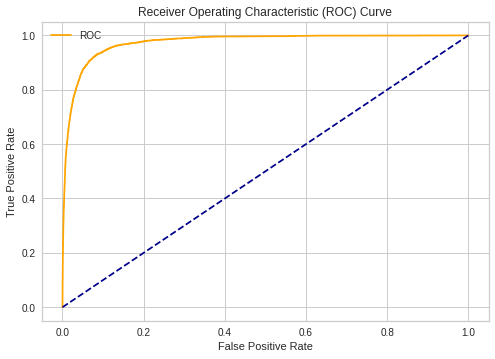

              precision    recall  f1-score   support

         Yes       0.97      0.99      0.98     70067
          No       0.80      0.50      0.62      3705

    accuracy                           0.97     73772
   macro avg       0.89      0.75      0.80     73772
weighted avg       0.97      0.97      0.97     73772



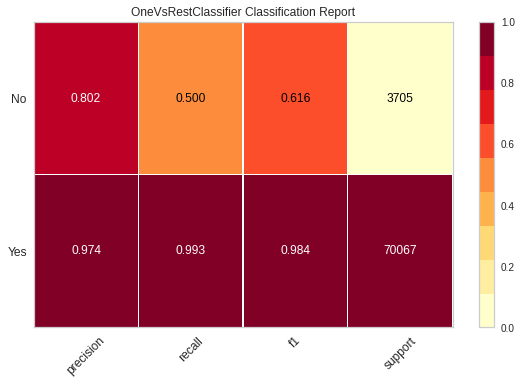

... Processing identity_hate
Test accuracy is 0.9917312801604945


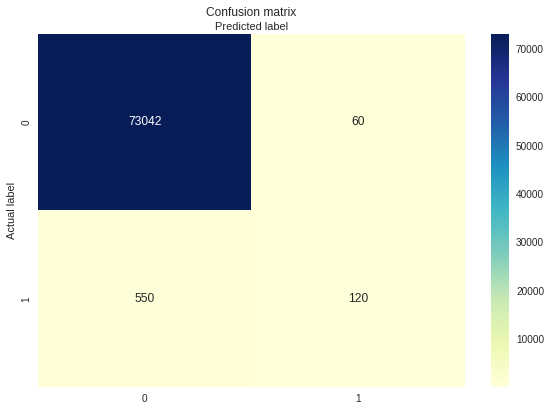

AUC: 0.98


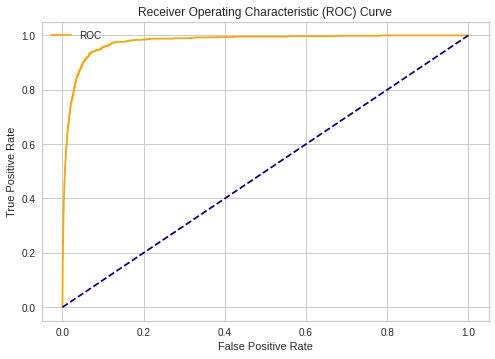

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73102
          No       0.67      0.18      0.28       670

    accuracy                           0.99     73772
   macro avg       0.83      0.59      0.64     73772
weighted avg       0.99      0.99      0.99     73772



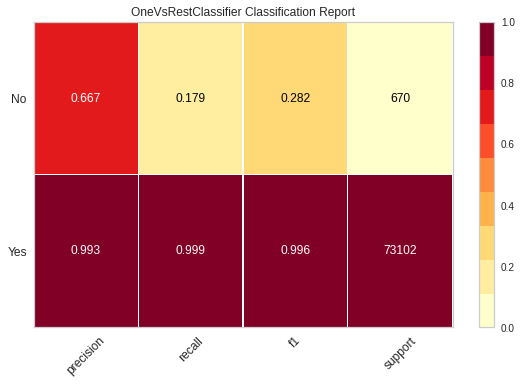

In [ ]:
#Logistic Regression
LR_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=1)),
            ])
for category in categories:
        print('... Processing {}'.format(category))
        # train the model using X_dtm & y
        LR_pipeline.fit(X_train, train[category])
        # compute the testing accuracy
        prediction = LR_pipeline.predict(X_test)
        print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
        #confusion Matrix
        matrix =confusion_matrix(test[category], prediction)
        class_names=[0,1] 
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #ROC_AUC curve
        probs = LR_pipeline.predict_proba(X_test) 
        probs = probs[:, 1]  
        auc = roc_auc_score(test[category], probs)  
        print('AUC: %.2f' % auc)
        le = preprocessing.LabelEncoder()
        y_test1=le.fit_transform(test[category])
        fpr, tpr, thresholds = roc_curve(y_test1, probs)
        plot_roc_curve(fpr, tpr)
        #Classification report
        target_names = ['Yes', 'No']
        print(classification_report(test[category], prediction, target_names=target_names))
        classes = ["Yes", "No"]
        visualizer = ClassificationReport(LR_pipeline, classes=classes, support=True)
        visualizer.fit(X_train, train[category])  
        visualizer.score(X_test, test[category])  
        g = visualizer.poof()


... Processing toxic


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test accuracy is 0.9504147915198178


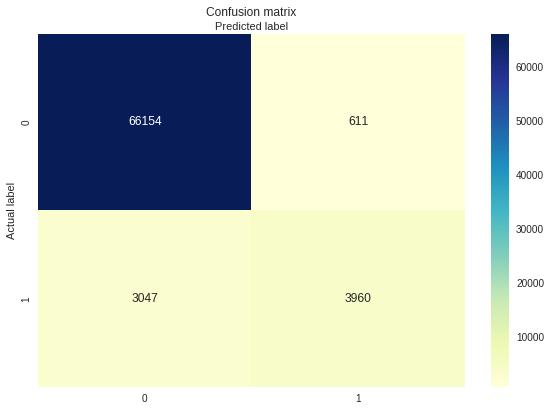

AUC: 0.79


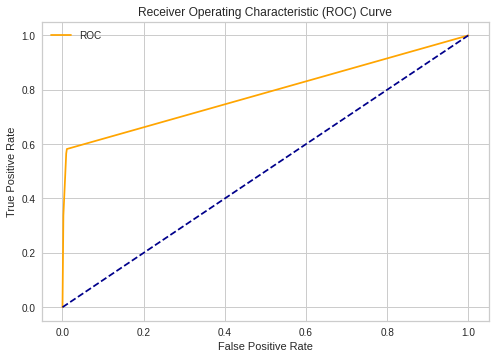

              precision    recall  f1-score   support

         Yes       0.96      0.99      0.97     66765
          No       0.87      0.57      0.68      7007

    accuracy                           0.95     73772
   macro avg       0.91      0.78      0.83     73772
weighted avg       0.95      0.95      0.95     73772



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


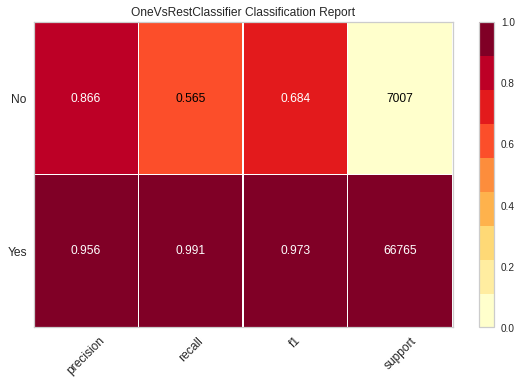

... Processing severe_toxic
Test accuracy is 0.9918532776663233


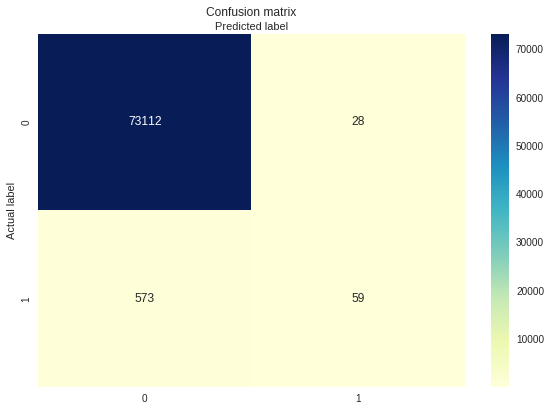

AUC: 0.64


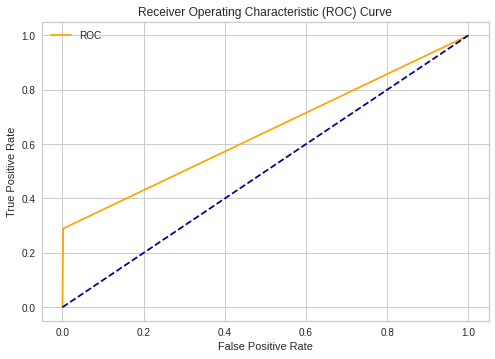

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73140
          No       0.68      0.09      0.16       632

    accuracy                           0.99     73772
   macro avg       0.84      0.55      0.58     73772
weighted avg       0.99      0.99      0.99     73772



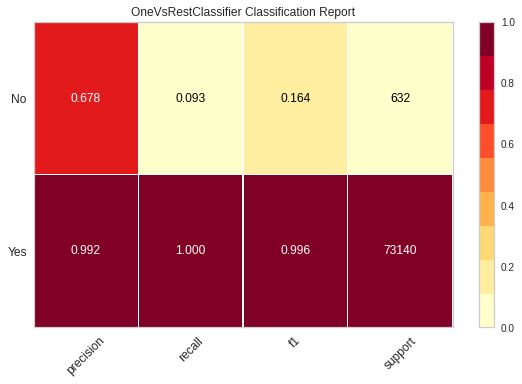

... Processing obscene
Test accuracy is 0.9734045437293282


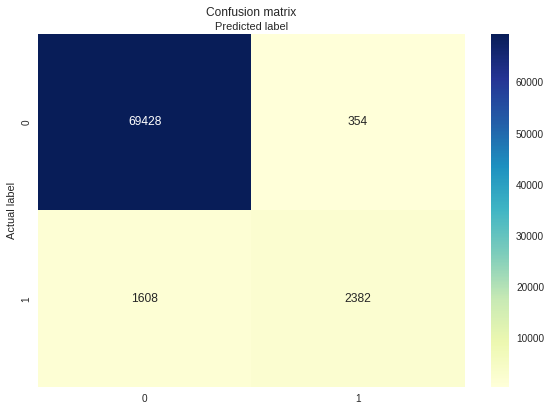

AUC: 0.81


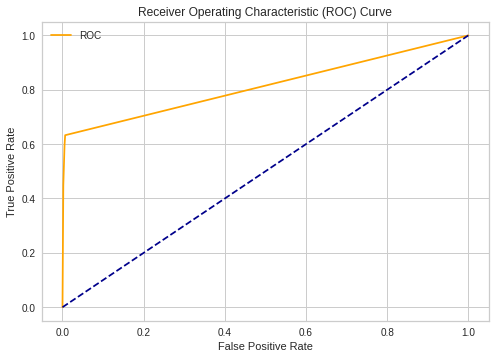

              precision    recall  f1-score   support

         Yes       0.98      0.99      0.99     69782
          No       0.87      0.60      0.71      3990

    accuracy                           0.97     73772
   macro avg       0.92      0.80      0.85     73772
weighted avg       0.97      0.97      0.97     73772



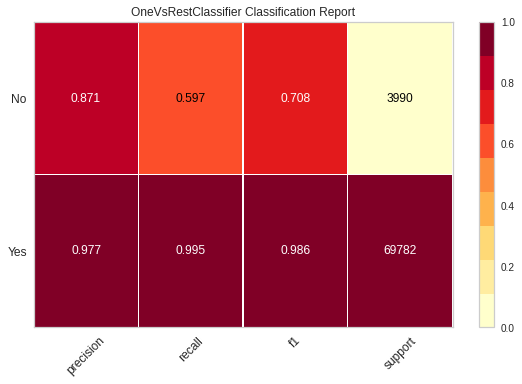

... Processing threat
Test accuracy is 0.9972482784796399


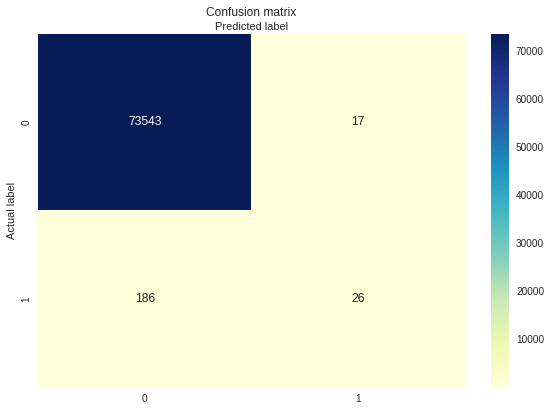

AUC: 0.60


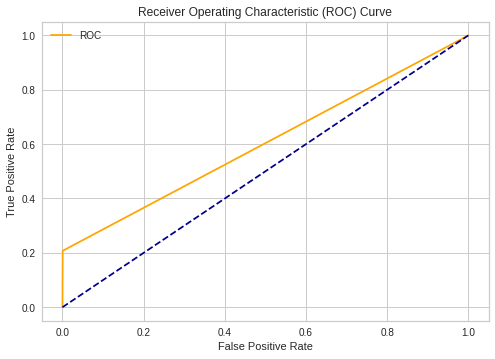

              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00     73560
          No       0.60      0.12      0.20       212

    accuracy                           1.00     73772
   macro avg       0.80      0.56      0.60     73772
weighted avg       1.00      1.00      1.00     73772



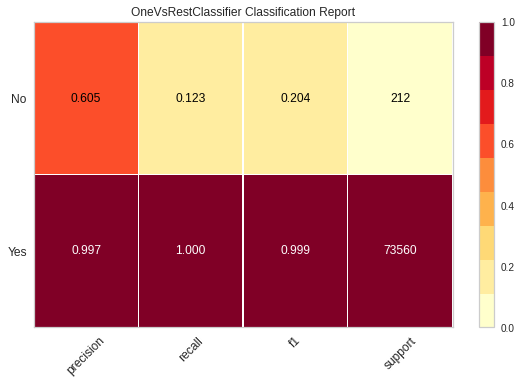

... Processing insult
Test accuracy is 0.9687008621157078


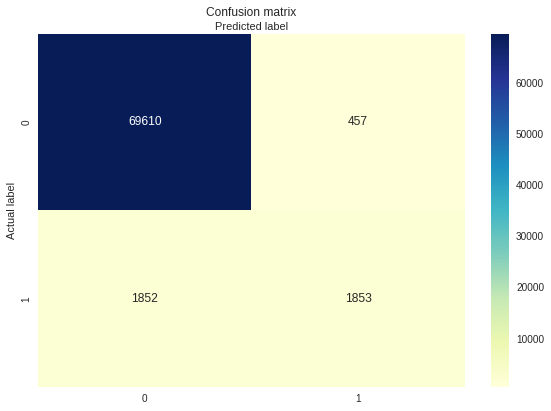

AUC: 0.76


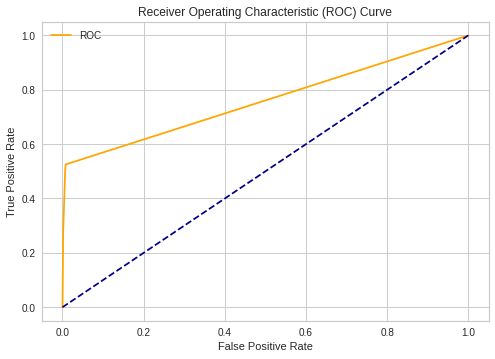

              precision    recall  f1-score   support

         Yes       0.97      0.99      0.98     70067
          No       0.80      0.50      0.62      3705

    accuracy                           0.97     73772
   macro avg       0.89      0.75      0.80     73772
weighted avg       0.97      0.97      0.97     73772



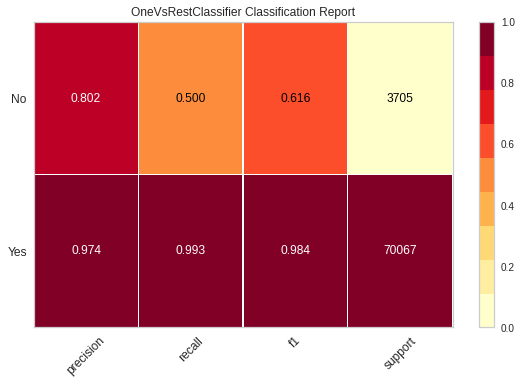

... Processing identity_hate
Test accuracy is 0.9917041696036436


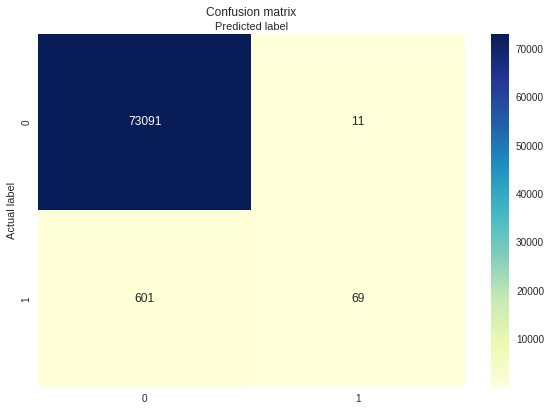

AUC: 0.63


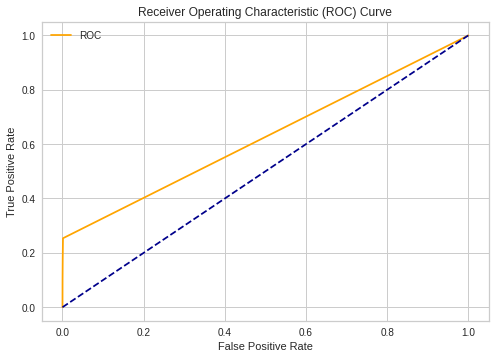

              precision    recall  f1-score   support

         Yes       0.99      1.00      1.00     73102
          No       0.86      0.10      0.18       670

    accuracy                           0.99     73772
   macro avg       0.93      0.55      0.59     73772
weighted avg       0.99      0.99      0.99     73772



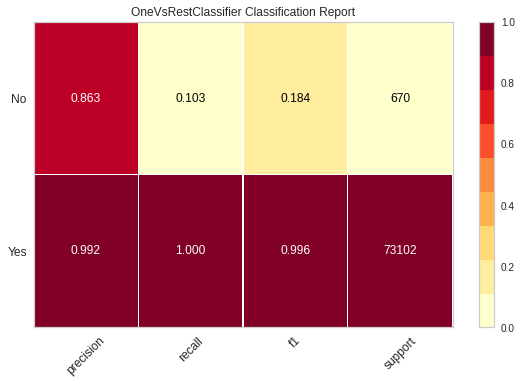

In [ ]:
#Stacking
xg = xgb.XGBClassifier()
lr = LogisticRegression()
ad = AdaBoostClassifier()
classifiers=[xg,lr]
sc = StackingClassifier(classifiers,meta_classifier=ad)
SC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(sc, n_jobs=1)),
            ])
for category in categories:
        print('... Processing {}'.format(category))
        # train the model using X_dtm & y
        SC_pipeline.fit(X_train, train[category])
        # compute the testing accuracy
        prediction = SC_pipeline.predict(X_test)
        print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
        #confusion Matrix
        matrix =confusion_matrix(test[category], prediction)
        class_names=[0,1] 
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #ROC_AUC curve
        probs = SC_pipeline.predict_proba(X_test) 
        probs = probs[:, 1]  
        auc = roc_auc_score(test[category], probs)  
        print('AUC: %.2f' % auc)
        le = preprocessing.LabelEncoder()
        y_test1=le.fit_transform(test[category])
        fpr, tpr, thresholds = roc_curve(y_test1, probs)
        plot_roc_curve(fpr, tpr)
        #Classification report
        target_names = ['Yes', 'No']
        print(classification_report(test[category], prediction, target_names=target_names))
        classes = ["Yes", "No"]
        visualizer = ClassificationReport(SC_pipeline, classes=classes, support=True)
        visualizer.fit(X_train, train[category])  
        visualizer.score(X_test, test[category])  
        g = visualizer.poof()
